In [1]:
# multidimensional arrays
import numpy as np

# inline plots
import matplotlib.pyplot as plt
%matplotlib inline

# nicer figures
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# Return to the origin
In this notebook, we will do numerical simulations of $d$-dimensional random walks. Then we will make a comparison between our numerical results for the **expected number of returns to the origin** and compare them with the answer to *Exercise 2.1: Return to the origin in random walks.*

## Generating Random Walks


### Exercise
Write a function that generates a random walk of given length in $d$ dimensions. Your random walker should move as follows:

+ At each time-step, the walker moves only in one direction.
+ At each time-step, the walker moves only by -1 or +1

Your function should return a numpy array of shape (`length`, `dim`). Example:
```python
>>> # create a RW of length 10 in dimension 3
>>> traj = get_traj(length=10, dim=3)
>>> # check that the output has the right shape
>>> traj.shape
(10, 3)
>>> # position after 4 time-steps
>>> traj[4]
array([ 3., -1., -1.])
>>> # second component of the trajectory, for all times
>>> # python uses 0-indexing!
>>> traj[:, 1] 
array([0, -1., -1., -1., -1.,  0.,  0.,  1.,  1.,  1.])
```


In [2]:
def get_traj(length=100, dim=2):
    """Generate a RW in d dimensions
    
    Parameters
    ----------
    length: int
        Length of the RW.
    dim: int
        Dimension of the RW
    

    Returns
    -------
    traj : np.ndarray, (length, dim)
        The positions of the RW.
    
    Notes
    -----
    At each time-step, the walker moves in only one direction.
    At each time-step, the walker moves by -1 or +1
    """
    traj = np.empty(shape=(length ,dim)) #creo un array vuoto che ha lunghezza 100 e dimensione 2, quindi ho 100 punti
    #che hanno due coordinate
    
    
    #creo un numero casuale tra 0 e 2 e lo traslo di 1 (np.random.randint genera un numero 
    #casuale tra 0 e il primo valore messo tra parentesi)
    traj = 1 - np.random.randint(3, size=(length, dim))
    
    for time in range(length):
        
        if time == 0: #vado avanti quando sono nell'origine
            continue
            
        else:
            
            for elem in range(dim):
                traj[time][elem] = traj[time-1][elem]#tengo memoria del vettore precedente
            
            comp = np.random.randint(dim)#sceglie o 0 o 1 perchè la dimensione è 2
            step = np.random.choice([1,-1])
            traj[time][comp] += step
    
    return traj

In [3]:
get_traj(20,2) #provo a vedere come si muove ad ogni step

array([[ 0,  0],
       [ 0,  1],
       [ 0,  0],
       [-1,  0],
       [-2,  0],
       [-2,  1],
       [-3,  1],
       [-3,  0],
       [-3,  1],
       [-4,  1],
       [-3,  1],
       [-2,  1],
       [-2,  2],
       [-2,  1],
       [-2,  2],
       [-2,  1],
       [-2,  0],
       [-3,  0],
       [-3,  1],
       [-4,  1]])

### Verification
To make sure that your function works correctly, execute the following cell. Notice the use of `assert` statements: execution should fail if something goes wrong. If everything is fine, nothing should happen.

In [4]:
# basic checks for your RW generator
for dim in range(1, 5):
    for length in [10, 100, 200, 500]:
        traj = get_traj(length=length, dim=dim)
        # make sure traj has the right shape
        assert traj.shape == (length, dim)
        # make sure all steps are -1 or 1 in only one direction
        assert np.all(np.sum(np.diff(traj, axis=0) != 0, axis=1) == np.ones(length - 1))

### Exercise
Plot a random walk of length $10^4$ for $d=1$ (time in x-axis, position in y-axis) and $d=2$ (x,y components in x,y-axis). Remember to use **axis labels**.

In [5]:
# it is better if you use one cell to generate the random walks, and a second cell to plot them

RW_1d = get_traj(length=10**4, dim=1)
RW_2d = get_traj(length=10**4, dim=2)

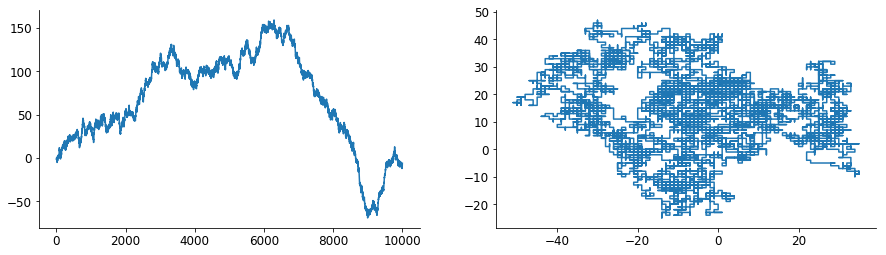

In [6]:
# We generate a figure with two subplots, called axis in matplotlib.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
    
# To use the left subplot, we do
x = range(0, 10**4) 
ax1.plot(x, RW_1d)

# while to use the right subplot, we do
ax2.plot(RW_2d[:,0], RW_2d[:,1])


## Counting the number of returns to the origin
Since we are interested in how **the expected number of returns to the origin** scales with the RW length, we don't need to store the whole trajectory of each simulation (we will be performing many simulations!). 

### Exercise
Write a function that generates a RW of given length and dimension (calling `get_traj`), and returns the number of times it returned to the origin. To count the number of returns to the origin, you might need to use the following functions:
```python
np.all()
np.zeros()
```

In [7]:
def get_num_returns(length, dim):
    
    # generate a RW of given length and dimension
    traj = get_traj(length=length, dim=dim)
    
    # count how many times it goes through the origin
    
    num_returns_to_origin=0
    
    for x in range(0, length):
        if np.all(traj[x,:]==np.zeros(dim)) == True: #prendo tutta la riga [x,:], prendo tutta la colonna [:,x]
            num_returns_to_origin+=1
    
    return num_returns_to_origin

In [8]:
get_num_returns(10**4, 1)


33

### Exercise
Write a function that computes the expected number of returns to the origin for a given length and dimension. Your function will call `get_num_returns()`, and should have an additional parameter that sets the sample size.

In [9]:
def get_average_num_returns(length, dim, num_trajs=200):
    
#creo 200 RW e guardo in media il numero di ritorni all'origine

    returns=0
    
    for i in range(0, num_trajs):
        returns = returns + get_num_returns(length=length, dim=dim)
        
    average_num_returns = returns/num_trajs
    
    return average_num_returns

## Comparing with analytical results
We are now ready to compare our analytical results with numerical simulations! We want to plot the expected number of returns to the origin as a function of the RW length. To do this, it is useful to first define an array of RW lengths.

In [10]:
# define range of RW lengths
length_min = 5
length_max = 100 #dovrebbe essere 100000, scrivo 100 altrimenti non finisce di compilare la cella successiva

# generate points logarithmically spaces
# and convert them to integers

length_array = np.array([
    int(x)
    for x in np.geomspace(length_min, length_max, num=20)
])

(tip: if your RW generating function is not very efficient, you might want to decrease `length_min`)  

Executing the following cell will run all simulations for $d=1$


In [11]:
dim=1
num_returns_array = np.array([
    get_average_num_returns(length=length, dim=dim)
    for length in length_array
])

### Exercise
Plot the average number of returns to the origin of a 1D RW as a function of the RW length, together with the analytical result from problem 2.1. Do your results verify the $n^{1/2}$ scaling? **Tip** Use double-logarithmic scales in your plot. Remember to include label axis, and a legend!

Text(0.5,1,'Plot of theoretical and numerical results in 1-d')

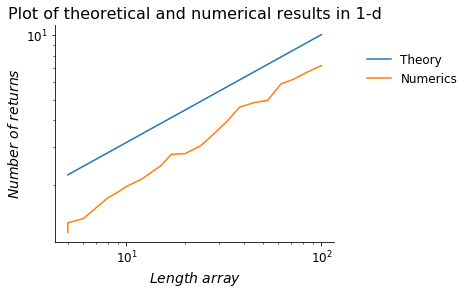

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))

# plot theoretical result
ax.loglog(length_array, np.sqrt(length_array), label="Theory")

# plot numerical result
ax.loglog(length_array, num_returns_array, label="Numerics")

# add axis labels
ax.set_xlabel(r"$Length$ $array$")
ax.set_ylabel(r"$Number$ $of$ $returns$")

# add a legend
ax.legend(loc=(1.1, 0.7), frameon=False)

# add a title (e.g. that says what dimension we used)

ax.set_title(f"Plot of theoretical and numerical results in 1-d")

### Exercise
Plot the average number of returns to the origin of a 2D RW as a function of the RW length, together with the analytical result from problem 2.1. Do your results verify the $log(n)$ scaling? What are the best axis scales to use in this case?

In [13]:
dim=2
num_returns_array = np.array([
    get_average_num_returns(length=length, dim=dim)
    for length in length_array
])

Text(0.5,1,'Plot of theoretical and numerical results in 2-d')

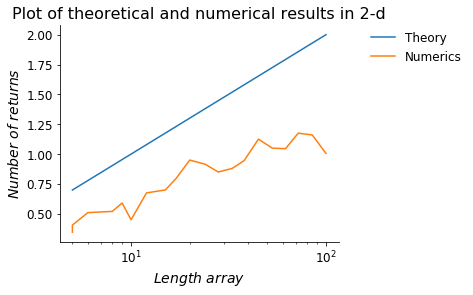

In [14]:
# plot the numerical results + theory

fig2, ax2 = plt.subplots(1, 1, figsize=(5, 4))

# plot theoretical result
ax2.plot(length_array, np.log10(length_array), label="Theory")

# plot numerical result
ax2.plot(length_array, num_returns_array, label="Numerics")
ax2.set_xscale("log")


# add axis labels
ax2.set_xlabel(r"$Length$ $array$")
ax2.set_ylabel(r"$Number$ $of$ $returns$")

# add a legend
ax2.legend(loc=(1.1, 0.8), frameon=False)

# add a title (e.g. that says what dimension we used)

ax2.set_title(f"Plot of theoretical and numerical results in 2-d")

### Exercise
Show numerically that, for $d=3$ and $d=4$, the expected number of returns to the origin is **constant**, as we proved in problem 2.1 (actually, we proved that that holds for any $d \geq 3$).

In [15]:
#dimensione 3

dim=3
num_returns_array = np.array([
    get_average_num_returns(length=length, dim=dim)
    for length in length_array
])

Text(0.5,1,'Plot of numerical results in 3-d')

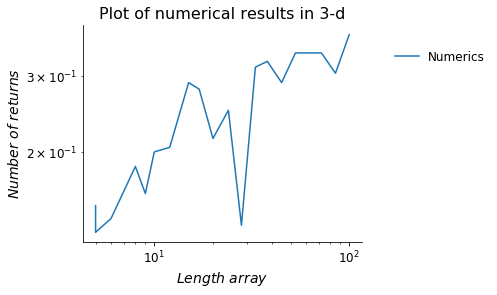

In [16]:
# plot the numerical results

fig3, ax3 = plt.subplots(1, 1, figsize=(5, 4))

# plot numerical result
ax3.loglog(length_array, num_returns_array, label="Numerics")

# add axis labels
ax3.set_xlabel(r"$Length$ $array$")
ax3.set_ylabel(r"$Number$ $of$ $returns$")

# add a legend
ax3.legend(loc=(1.1, 0.8), frameon=False)

# add a title (e.g. that says what dimension we used)

ax3.set_title(f"Plot of numerical results in 3-d")


In [17]:
#dimensione 4

dim=4
num_returns_array = np.array([
    get_average_num_returns(length=length, dim=dim)
    for length in length_array
])

Text(0.5,1,'Plot of numerical results in 4-d')

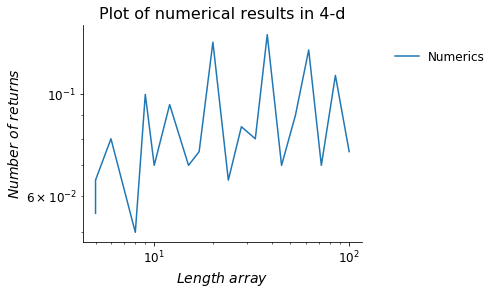

In [18]:
# plot the numerical results

fig4, ax4 = plt.subplots(1, 1, figsize=(5, 4))

# plot numerical result
ax4.loglog(length_array, num_returns_array, label="Numerics")

# add axis labels
ax4.set_xlabel(r"$Length$ $array$")
ax4.set_ylabel(r"$Number$ $of$ $returns$")

# add a legend
ax4.legend(loc=(1.1, 0.8), frameon=False)

# add a title (e.g. that says what dimension we used)

ax4.set_title(f"Plot of numerical results in 4-d")
